In [1]:
Avg_acc_all_dataset=[]
Avg_acc_all_dataset_without_FS=[]
Avg_feature_all_dataset=[]
Avg_fitness_all_dataset=[]

In [2]:
import numpy as np
from random import randint
from random import uniform
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import math

In [3]:
data=pd.read_csv('csv_result-CM1.csv')
data.head()

,id,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,1,9,5,3,2,2,8,3,0.16,4,...,10,0.10,36,66,21,17,31,19.05,19,N
1,2,19,3,1,2,0,4,2,0.06,2,...,23,0.04,66,69,34,12,55,5.71,35,N
2,3,0,9,0,0,0,10,5,0.56,2,...,9,0.50,10,21,7,9,10,0.00,9,N
3,4,2,15,2,1,9,24,8,0.19,10,...,18,0.15,67,120,43,19,54,19.61,42,N
4,5,5,5,1,0,0,8,3,0.15,4,...,9,0.12,25,46,17,14,26,0.00,20,N


In [4]:
data.shape

(327, 39)

In [5]:
print(data.isnull().sum())



id                                 0
LOC_BLANK                          0
BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DECISION_DENSITY                   0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0
ESSENTIAL_DENSITY                  0
LOC_EXECUTABLE                     0
PARAMETER_COUNT                    0
HALSTEAD_CONTENT                   0
HALSTEAD_DIFFICULTY                0
HALSTEAD_EFFORT                    0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_PROG_TIME                 0
HALSTEAD_VOLUME                    0
MAINTENANCE_SEVERITY               0
M

In [6]:
#data=data.fillna(0)
#print(data.isnull().sum())

In [7]:
#Separate the features and output column

y=data.iloc[:,-1]
tdata=data.iloc[:,0:-1]
#tdata

In [8]:
from sklearn import preprocessing
from sklearn import utils
label = preprocessing.LabelEncoder()

y=label.fit_transform(y)
#y=label.fit_transform(y)

y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [9]:
max_itr=200
rows, columns= data.shape[0], data.shape[1]
NP=30 #Number of population
dim=columns-1 #Dimesnsion of the problem
repeat=10

In [10]:
from sklearn.model_selection import train_test_split

training_data,testing_data,training_classlebel,testing_classlebel=train_test_split(tdata,y,test_size=0.2,random_state=42)
training_data.shape,testing_data.shape,training_classlebel.shape,testing_classlebel.shape

((261, 38), (66, 38), (261,), (66,))

In [11]:
import random
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()



In [12]:

average_fitness=[]
average_accuracy=[]
average_accuracy_without_FS=[]
average_feature=[]

In [13]:
populationSize = NP # Number of search agents
Max_iteration = max_itr
lb = 0
ub = dim-1
#ub=1
Best_score_T = np.zeros(repeat)

for run in range(repeat):
    print(f'Run no: {run}')
    # initialize Golden jackal pair
    Male_Jackal_pos = np.zeros(dim)
    Male_Jackal_score = float('inf')
    Female_Jackal_pos = np.zeros(dim)
    Female_Jackal_score = float('inf')
    #fit=np.zeros(NP)
    Boundary_no = 1

    Positions = np.zeros((populationSize, dim)) #Declaration
    # If each variable has a different lb and ub
    if Boundary_no > 1:
        for i in range(dim):
            ub_i = ub[i]
            lb_i = lb[i]
            Positions[:,i] = np.random.rand(populationSize,1) * (ub_i - lb_i) + lb_i
    if Boundary_no == 1:
      for i in range(NP):
        for d in range(dim):
          if random.random()>0.5:
            Positions[i,d]=1
    
   

    pop_size = Positions.shape[0]
    Convergence_curve = []
    Positions_new = np.zeros(Positions.shape)
    l = 1

    

    # Main loop
    while l <= Max_iteration:
        u=np.zeros(Positions.shape)
        Male_Positions = np.zeros((populationSize,dim))
        Female_Positions = np.zeros((populationSize,dim))
        for i in range(Positions.shape[0]):
            # boundary checking
            Flag4ub = Positions[i,:] > ub
            Flag4lb = Positions[i,:] < lb
            Positions[i,:] = (Positions[i,:]*(~(Flag4ub + Flag4lb))) + ub*Flag4ub + lb*Flag4lb

            #Use Transfer function

            for j in range(dim):

              TF=1/(1+math.exp(-Positions_new[i,j])) #Transfer Function 1

              if TF<random.random():
                u[i,j]=0
              else:
                u[i,j]=1

            # Calculate Fitness for each search agent
            if((training_data.iloc[:,u[i,:]==1]).shape[1]==0):
              fitness=1
            else:  
              o1=dtc.fit(training_data.iloc[:,u[i,:]==1],training_classlebel)
              Ac1=dtc.predict(testing_data.iloc[:,u[i,:]==1])
              fitness=sum(Ac1!=testing_classlebel)/testing_data.shape[0]
            
            # Update Male Jackal 
            if fitness < Male_Jackal_score:
                Male_Jackal_score = fitness
                Male_Jackal_pos = u[i,:] #Check Later
                
            if fitness > Male_Jackal_score and fitness < Female_Jackal_score:
                Female_Jackal_score = fitness
                Female_Jackal_pos = u[i,:] #Check Later


        E1 = 1.5*(1-(l/Max_iteration))
        beta = 1.5
        num = math.gamma(1+beta)*math.sin(math.pi*beta/2) # used for Numerator 
        den = math.gamma((1+beta)/2)*beta*2**((beta-1)/2) # used for Denominator
        sigma_u = (num/den)**(1/beta) # Standard deviation
        u = np.random.normal(0, sigma_u, (NP, dim))
        v = np.random.normal(0, 1, (NP, dim))
        z = u/(abs(v)**(1/beta))
        RL = 0.05*z

        for i in range(Positions.shape[0]): #1
            for j in range(Positions.shape[1]): #2
                r1=np.random.rand() # r1 is a random number in [0,1]
                E0=2*r1-1;            
                E=E1*E0 # Evading energy

                if abs(E)<1:
                    # EXPLOITATION
                    D_male_jackal=abs((RL[i,j]*Male_Jackal_pos[j]-Positions[i,j]))
                    Male_Positions[i,j]=Male_Jackal_pos[j]-E*D_male_jackal
                    D_female_jackal=abs((RL[i,j]*Female_Jackal_pos[j]-Positions[i,j]))
                    Female_Positions[i,j]=Female_Jackal_pos[j]-E*D_female_jackal
                else:
                    # EXPLORATION
                    D_male_jackal=abs((Male_Jackal_pos[j]- RL[i,j]*Positions[i,j]))
                    Male_Positions[i,j]=Male_Jackal_pos[j]-E*D_male_jackal
                    D_female_jackal=abs((Female_Jackal_pos[j]- RL[i,j]*Positions[i,j]))
                    Female_Positions[i,j]=Female_Jackal_pos[j]-E*D_female_jackal
                Positions[i,j]=(Male_Positions[i,j]+Female_Positions[i,j])/2
        Convergence_curve.append(Male_Jackal_score)
                        
        l=l+1
        
    #Select features        

    Sf=[]
    for k in range(dim):
        if Male_Jackal_pos[k]>0.5:
            Sf.append(k)
    Nf=len(Sf)

    print("Selected feature indices are: ",Sf)
    print("Number of selected features are: ",Nf)
    average_feature.append(Nf)

    #Accuracy without FS

    o1=dtc.fit(training_data,training_classlebel)
    Ac1=dtc.predict(testing_data)
    Fnew=sum(Ac1==testing_classlebel)/testing_data.shape[0]*100
    print("Accuracy without FS: ",Fnew)
    average_accuracy_without_FS.append(Fnew)

    #Accuracy with FS

    o1=dtc.fit(training_data.iloc[:,Sf],training_classlebel)
    Ac1=dtc.predict(testing_data.iloc[:,Sf])
    Fnew2=sum(Ac1==testing_classlebel)/testing_data.shape[0]*100
    print("Accuracy with FS: ",Fnew2)
    average_accuracy.append(Fnew2)

Run no: 0
Selected feature indices are:  [3, 4, 6, 7, 8, 11, 12, 13, 17, 18, 19, 21, 22, 27, 29, 32, 33, 35, 37]
Number of selected features are:  19
Accuracy without FS:  78.78787878787878
Accuracy with FS:  80.3030303030303
Run no: 1
Selected feature indices are:  [0, 2, 3, 8, 9, 10, 11, 13, 15, 17, 18, 19, 21, 23, 25, 28, 29, 31, 32, 33, 34, 35, 37]
Number of selected features are:  23
Accuracy without FS:  78.78787878787878
Accuracy with FS:  86.36363636363636
Run no: 2
Selected feature indices are:  [0, 2, 8, 10, 11, 12, 13, 15, 17, 18, 20, 24, 25, 27, 28, 29, 32, 33, 34, 35]
Number of selected features are:  20
Accuracy without FS:  80.3030303030303
Accuracy with FS:  81.81818181818183
Run no: 3
Selected feature indices are:  [0, 1, 2, 4, 6, 15, 17, 19, 20, 24, 25, 27, 29, 31, 32, 33, 34, 35, 36]
Number of selected features are:  19
Accuracy without FS:  78.78787878787878
Accuracy with FS:  80.3030303030303
Run no: 4
Selected feature indices are:  [2, 3, 4, 6, 8, 10, 11, 14, 19, 

In [14]:
print("CM1 Dataset results\n")

Average_no_of_features_selected = sum(average_feature)/len(average_feature)
Average_accuracy_without_FS = Fnew
Average_accuracy_with_FS = sum(average_accuracy)/len(average_accuracy)


print("average accuracy without FS", Average_accuracy_without_FS)
print("average accuracy with FS", Average_accuracy_with_FS)
print("average no of features selected", Average_no_of_features_selected)

CM1 Dataset results

average accuracy without FS 78.78787878787878
average accuracy with FS 84.0909090909091
average no of features selected 19.2


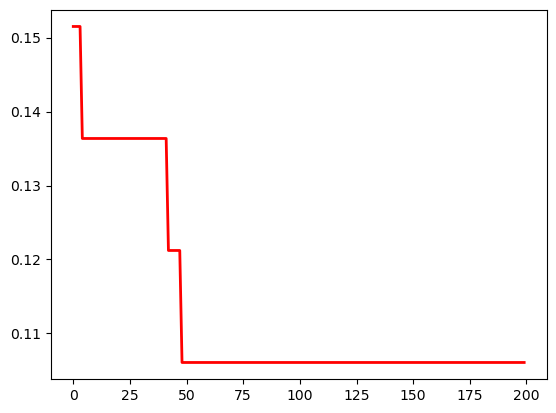

In [15]:
import matplotlib.pyplot as plt
plt.plot(Convergence_curve, color='r', linewidth=2)

In [16]:
print(Convergence_curve)

[0.15151515151515152, 0.15151515151515152, 0.15151515151515152, 0.15151515151515152, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.13636363636363635, 0.12121212121212122, 0.12121212121212122, 0.12121212121212122, 0.12121212121212122, 0.12121212121212122, 0.1212121212

In [17]:
import pickle

with open("CM1_DTfitness", "wb") as fp:   #Pickling
  pickle.dump(Convergence_curve, fp)
  

